# Lesson 7 - Parkinson PCR

## Author - Ana Javed

### Description:

Perform Principal Component Regression on a <a href="https://archive.ics.uci.edu/ml/datasets/parkinsons+telemonitoring">dataset that tracked patients with Parkinson's Disease</a>.

Citation: A Tsanas, MA Little, PE McSharry, LO Ramig (2009)
'Accurate telemonitoring of Parkinson's disease progression by non-invasive speech tests',
IEEE Transactions on Biomedical Engineering.

About the data:
This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.

#### Instructions:

 1. Load the dataset.
 2. Create the X-matrix (one-hot encoding categorical factors).
 3. Scale the X-matrix.
 4. Create the principal components and do a simple plot of the explained variance.
 5. PCR - Linear regression with the principal components.

Report on:

 1. Number of components before and after (choose a smaller number of principal components and explain how you chose them).
 2. Interpret the adjusted R-squared.

In [103]:
## URL to Parkinsons Data file
filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"

In [104]:
## Loading Required packages for the Assignment 
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns

In [105]:
## Reading in the CSV filt into pandas data frame 
parkinsons_df = pd.read_csv(filename)
parkinsons_df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [106]:
## Conducting some EDA on the Dataset
print(parkinsons_df.columns) ## Printing Columns 
print(parkinsons_df.shape) ## Printing Data Dimensions 
print(parkinsons_df.dtypes) ## Printing Column Types 

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')
(5875, 22)
subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object


In [107]:
## Defining the target and non-features:
target_label = 'total_UPDRS'
non_features = ['subject#', #'age', 'sex', 
                'test_time', 'motor_UPDRS']
feature_labels = [x for x in parkinsons_df.columns if x not in [target_label] + non_features]


# One-hot encode inputs --> Sex and Age Columns Specifically
parkinsons_expanded = pd.get_dummies(parkinsons_df, drop_first=True, columns=['age', 'sex'])
print('DataFrame one-hot-expanded shape: {}'.format(parkinsons_expanded.shape))


## Removing non-features and non-targets from Data Frame
for col in non_features:
    parkinsons_expanded = parkinsons_expanded.drop(col, axis=1)
    
## Restting the Index of the Data Frame
parkinsons_expanded=parkinsons_expanded.reset_index(drop=True)

# print(feature_labels)
# print(parkinsons_expanded)

### Getting target (y) and original X matrix (without Target Variable)
y = parkinsons_expanded[target_label]
X = parkinsons_expanded.loc[:, ['total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5',
       'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE',
       'age_49', 'age_55', 'age_56', 'age_57', 'age_58', 'age_59', 'age_60',
       'age_61', 'age_62', 'age_63', 'age_65', 'age_66', 'age_67', 'age_68',
       'age_71', 'age_72', 'age_73', 'age_74', 'age_75', 'age_76', 'age_78',
       'age_85', 'sex_1']].to_numpy()



DataFrame one-hot-expanded shape: (5875, 43)


In [108]:
## New Columns with Dummy Variables: 
parkinsons_expanded.columns

Index(['total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5',
       'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE',
       'age_49', 'age_55', 'age_56', 'age_57', 'age_58', 'age_59', 'age_60',
       'age_61', 'age_62', 'age_63', 'age_65', 'age_66', 'age_67', 'age_68',
       'age_71', 'age_72', 'age_73', 'age_74', 'age_75', 'age_76', 'age_78',
       'age_85', 'sex_1'],
      dtype='object')

In [109]:
# Declaring Scale function
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [110]:
### Scaling all columns first: 

# Create x-scaled (look into the function np.apply_along_axis to apply 'scale' function
#    to each column).
x_scaled = np.apply_along_axis(scale, 0, X) # column wise = 0 

# Create a scaled y-target.
y_scaled = scale(y) # Using Scale Function 

In [111]:
### PCR
pca = PCA(n_components=40) # Passing number of components in dataset with dummy variables 
pca_result = pca.fit_transform(x_scaled) # Fitting PCA

column_names = ['pc' + str(ix+1) for ix in range(x_scaled.shape[1])]

pca_df = pd.DataFrame(data = pca_result, columns=column_names) # Creating Data Frame 
pca_df[target_label] = y_scaled 

## Printing Head of PCA Data Frame
pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,total_UPDRS
0,-1.047620,0.536135,-0.483261,-0.976474,2.635050,-0.307198,-1.414057,-0.160834,-1.417476,0.063891,...,0.149456,0.198306,-0.008600,-0.016105,-0.053589,0.004687,0.021989,0.000796,0.000005,0.502745
1,-2.646119,0.722761,-0.840631,-0.547020,2.459498,-0.353450,-1.416485,0.004457,-1.462813,0.016319,...,-0.005734,0.109500,0.008450,0.015782,0.027710,-0.000310,0.013006,-0.000728,-0.000010,0.549103
2,-1.989654,0.269057,-0.771966,-1.014934,2.540723,-0.648995,-1.585815,-0.085110,-1.523648,0.024125,...,-0.052955,0.176746,-0.071554,-0.003980,-0.038995,-0.046200,-0.012200,0.000776,0.000003,0.595367
3,-1.083374,-0.064112,-0.891892,-0.820498,2.317440,-0.542875,-1.817713,-0.023541,-1.506558,-0.003358,...,-0.655043,0.242534,-0.269875,0.030766,-0.041349,0.025748,-0.190604,0.000002,0.000184,0.634716
4,-2.514738,0.314239,-0.999182,-0.745406,2.400502,-0.595567,-1.603361,0.008661,-1.517876,0.002817,...,-0.066348,0.106982,-0.032988,0.026889,-0.009040,-0.053709,-0.007674,-0.000733,0.000171,0.687522


Feature  1 : 11.553347098171486
Feature  2 : 2.2229219992304565
Feature  3 : 1.9780177695822512
Feature  4 : 1.7743212449249062
Feature  5 : 1.4999199106280183
Feature  6 : 1.298391331812017
Feature  7 : 1.092442152280038
Feature  8 : 1.0852093769179152
Feature  9 : 1.081384911044772
Feature  10 : 1.0717782032923524
Feature  11 : 1.0665829659767259
Feature  12 : 1.0626081621192203
Feature  13 : 1.0525539046628307
Feature  14 : 1.050834521974648
Feature  15 : 1.0455356983493818
Feature  16 : 1.0422499049702694
Feature  17 : 1.0386667006268808
Feature  18 : 1.0370301369713386
Feature  19 : 1.0307360573073874
Feature  20 : 1.028632583337645
Feature  21 : 1.026628403513712
Feature  22 : 0.9080012328759451
Feature  23 : 0.7487898278538818
Feature  24 : 0.5149551915450835
Feature  25 : 0.3823305736963116
Feature  26 : 0.31627935146476244
Feature  27 : 0.23095476678580995
Feature  28 : 0.17815712332649186
Feature  29 : 0.14799137862452932
Feature  30 : 0.1397542746409286
Feature  31 : 0.11437

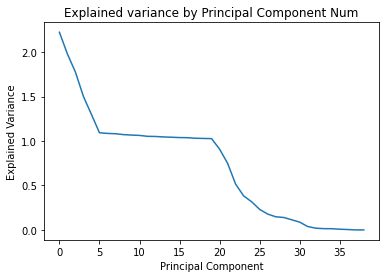

In [112]:
# Plotting the explained variance for all principal components.
# Note: If the first value is too large, it may dwarf how the rest look.
# You may consider plotting starting with the 2nd value (python index at 1).
exp_var = pca.explained_variance_[1:] # Removing the First Feature since it's very high

plt.plot(exp_var) 
plt.title('Explained variance by Principal Component Num')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')


# Identifying How much variance in the original features are explaining with each principal component?
# print(pca.explained_variance_)
# print(pca.components_)

for val in range(0, 40):
    print("Feature ", val+1, ":", pca.explained_variance_[val])

### Performing Linear Regression with Various N Columns: 

                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.668e+31
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:57:55   Log-Likelihood:             1.9305e+05
No. Observations:                5875   AIC:                        -3.860e+05
Df Residuals:                    5834   BIC:                        -3.857e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.882e-16    1.7e-17     11.083      0.0

/Users/anajaved/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/anajaved/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


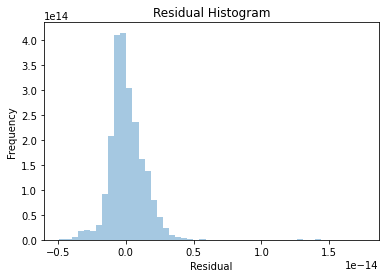

In [113]:
# Perform linear regression with the original 40 components: 
n = 40
formula_start = target_label + ' ~ ' 
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end 
# print(formula_final)

# Calling and Fitting Model 
pcr_model = sm.ols(formula = formula_final, data=pca_df)
results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

print('Intercept, Slope : {}'.format(results.params))

                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     2589.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:58:02   Log-Likelihood:                -1618.2
No. Observations:                5875   AIC:                             3278.
Df Residuals:                    5854   BIC:                             3419.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.543e-16      0.004   8.51e-14      1.0

/Users/anajaved/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Intercept, Slope : Intercept    3.543173e-16
pc1          3.560089e-02
pc2         -4.783845e-02
pc3         -5.443755e-01
pc4         -3.863285e-01
pc5         -3.190091e-02
pc6          1.333046e-01
pc7          4.955738e-02
pc8          6.213171e-03
pc9         -3.115097e-03
pc10         1.658762e-03
pc11        -9.340983e-03
pc12        -1.446746e-02
pc13        -9.390880e-03
pc14        -1.233600e-03
pc15        -1.434219e-03
pc16         3.127476e-03
pc17        -8.324979e-03
pc18        -3.574184e-03
pc19        -2.799328e-03
pc20        -2.355083e-03
dtype: float64


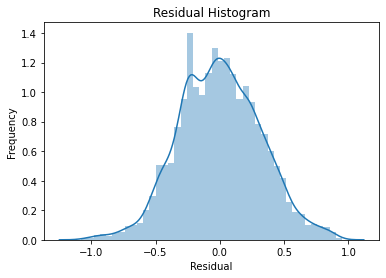

In [114]:
# Perform linear regression with half or 20 components: 
n = 20
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end

# Calling and Fitting Model 
pcr_model = sm.ols(formula = formula_final, data=pca_df)
results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

print('Intercept, Slope : {}'.format(results.params))

                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     5157.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:58:15   Log-Likelihood:                -1633.3
No. Observations:                5875   AIC:                             3289.
Df Residuals:                    5864   BIC:                             3362.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.543e-16      0.004   8.49e-14      1.0

/Users/anajaved/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


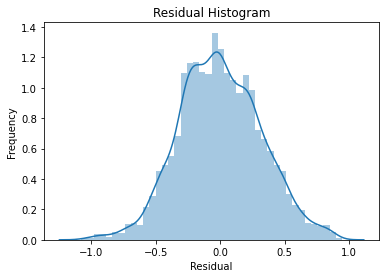

In [115]:
# Perform linear regression with 10 components: 
n = 10
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end


# Calling and Fitting Model 
pcr_model = sm.ols(formula = formula_final, data=pca_df)
results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

print('Intercept, Slope : {}'.format(results.params))

                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     7367.
Date:                Mon, 25 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:58:22   Log-Likelihood:                -1634.9
No. Observations:                5875   AIC:                             3286.
Df Residuals:                    5867   BIC:                             3339.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.543e-16      0.004   8.49e-14      1.0

/Users/anajaved/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


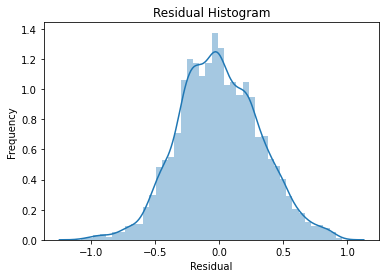

In [116]:
# Perform linear regression with 7 components: 
n = 7
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end


# Calling and Fitting Model 
pcr_model = sm.ols(formula = formula_final, data=pca_df)
results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

print('Intercept, Slope : {}'.format(results.params))

### Summary of your results!

For this analysis, I examined and conducted principal component regression on Parkinsons Data. I first created dummy variables for Age and Sex columns, and in total had 40 components to conduct linear regression on. The "Subject#", "test_time", "motor_UPDRS" columns are non-features and thus they were removed from the analysis. The 'total_UPDRS' column was our target variable.

After conducting principal component analysis, I plotted the explained variance for each component and saw the line graph start very high and then decrease at component 5, and then continously decrease again at component 20 and on. Seeing this visually helped since it provided a starting point for the linear regression portion.

I first conducted a linear regression with all 40 components to see how the model fitted. As expected, the Adjusted R-squared was 1.00 and the AIC was very large at -3.860e+05. With such a large AIC, I knew a better model could be found.

I then conducted a linear regression with 20 components. The results included an adjusted R-squared of 0.898 and AIC of 3278. The model results also showed multiple components having a large p-value, so not all components were statistically significant. The adjusted R-squared and AIC are a good start. 

I then reduced the components to 10 and ran another linear regression. The Adjusted R-squared is the same as 20 components and was sitting at .898. The AIC was higher however at 3289. I also noticed that a few components had high p-values and so I reduced the components to amount where there would be all signficantly statistic components in the regression. This number was 7 components.

Lastly I ran a linear regression for 7 components. To my surprise, the adjusted R-squared was maintained at 0.898, and it had a lower AIC at 3286. All p values were statistically significant. Thus, I believe this is the best model with 7 components. 